<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/DIP_deconv_richardson_lucy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage
skimage.__version__

'0.18.3'

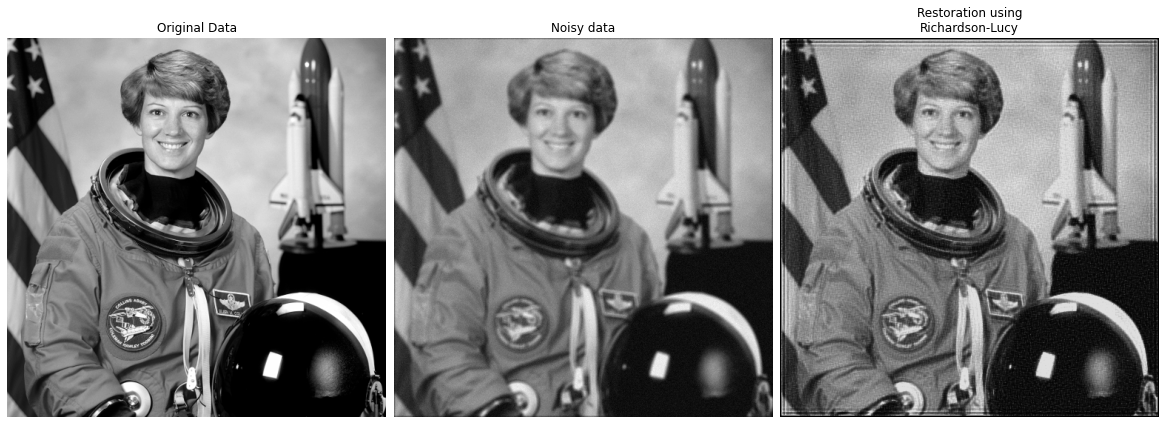

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration


astro = color.rgb2gray(data.astronaut())

# bluring
psf_size = 5
psf = np.ones((psf_size, psf_size)) / (psf_size**2)
astro_blurred = conv2(astro, psf, 'same')

# Add Noise to Image
rng = np.random.default_rng()
astro_noisy = astro_blurred.copy()
astro_noisy += (rng.poisson(lam=25, size=astro_blurred.shape) - 10) / 255.

# ------------------------------------
# deconv

# # Restore Image using Richardson-Lucy algorithm, scikit-image 2.x
# deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, num_iter=30)

# Restore Image using Richardson-Lucy algorithm, scikit-image 1.8
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

# end -------------------------------


# display
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

# ing...

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

In [ ]:
def get_psf(px, sigma):
    half_px = px // 2
    x, y = np.mgrid[-half_px:half_px+1:, -half_px:half_px+1:]
    pos = np.dstack((x, y))
    mean = np.array([0, 0])  # 分布の平均
    cov = np.array([[sigma**2, 0], [0, sigma**2]])  # 分布の分散共分散行列
    rv = multivariate_normal(mean, cov)
    psf = rv.pdf(pos)
    return psf

In [ ]:
psf = get_psf(5,2)

In [ ]:
import matplotlib.pyplot as plt

def ds_plot(img_gray) :
  h,w = img_gray.shape
  x,y =np.mgrid[0:h,0:w]

  ax = plt.figure().gca(projection='3d')
  surf = ax.plot_surface(x,y,img_gray,
                         # cmap=plt.cm.gray
                         )
  ax.set_zticks([]);ax.set_yticks([]);ax.set_xticks([])
  # 80 : the elevation angle in the z plane (in degrees).
  # 20 : the azimuth angle in the (x, y) plane (in degrees).
  ax.view_init(10,20) 
  plt.gcf().colorbar(surf,shrink=1,aspect=10)

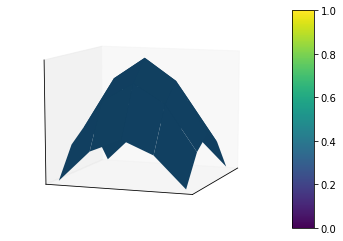

In [ ]:
ds_plot(psf)